Cleaned data loaded
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.71      0.82        95

    accuracy                           1.00     56746
   macro avg       0.99      0.85      0.91     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
 [[56649     2]
 [   28    67]]


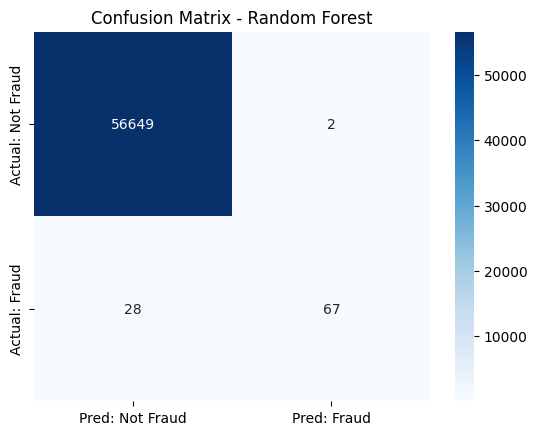

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv('../data/creditcard_cleaned.csv')
print("Cleaned data loaded")

# Separate features and target
X = df.drop(columns=['is_fraud'])
y = df['is_fraud'].astype(int)

# Scale features (optional but safe)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest with class balancing
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred: Not Fraud', 'Pred: Fraud'],
            yticklabels=['Actual: Not Fraud', 'Actual: Fraud'])
plt.title("Confusion Matrix - Random Forest")
plt.show()

## Model Performance Summary

We trained a Random Forest classifier on the cleaned credit card transaction data using class weighting to address class imbalance.

## Confusion Matrix

|                         | Predicted Not Fraud | Predicted Fraud |
|-------------------------|---------------------|-----------------|
| **Actual Not Fraud**    | 56,649 ✅            | 2 ❌ (False Positives) |
| **Actual Fraud**        | 28 ❌ (False Negatives) | 67 ✅ (True Positives) |

- **Total samples**: 56,746  
- **Fraud cases**: 95 (≈0.17%)  
- **Legit cases**: 56,651

---

### Classification Report (Class 1 = Fraud)

| Metric      | Score     |
|-------------|-----------|
| **Precision** | 0.97 ✅  |
| **Recall**    | 0.71 ✅  |
| **F1 Score**  | 0.82 ✅  |
| **Accuracy**  | ~99.8% ✅ |

- **Precision**: Only 2 false alarms out of 69 fraud predictions, very high trustworthiness  
- **Recall**: Caught 71% of actual fraud cases, very solid  
- **F1 Score**: Strong balance between catching fraud and keeping false alarms low

---

### Interpretation

- The model **prioritizes precision**, making it suitable for real-world fraud alert systems where false alarms are expensive.
- **Very low false positive rate** (only 2 out of 56,651 non-fraud cases).
- Slight drop in recall compared to Logistic Regression (which had 0.87), but **far better precision** (0.97 vs 0.06).
- **Training time** was longer (~1.5 min), but performance gain is worth it.

---

### Conclusion

Random Forest strikes a strong balance between **fraud detection and trustworthiness**, making it a solid candidate for deployment or dashboard integration.

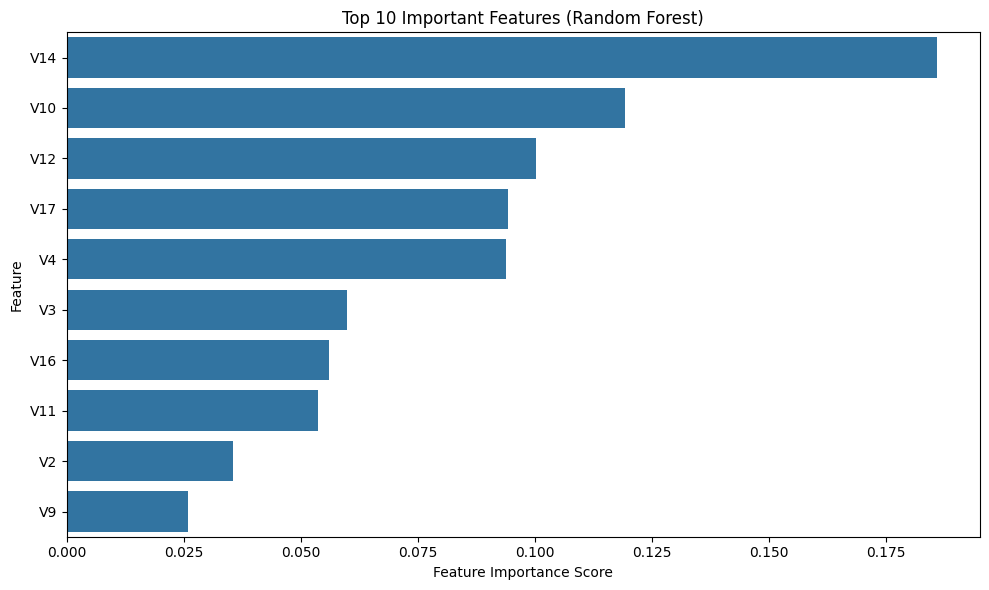

In [ ]:
# Feature importance from the trained Random Forest model
importances = model.feature_importances_
feature_names = df.drop(columns=['is_fraud']).columns

# Create a DataFrame for easy plotting
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10 features
colors = plt.cm.viridis(np.linspace(0.2, 0.8, 10))  # 10 colors
plt.figure(figsize=(10, 6))
plt.barh(feat_df.head(10)['Feature'][::-1], feat_df.head(10)['Importance'][::-1], color=colors)
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()



## Feature Importance

Random Forest allows us to extract the relative importance of each input feature in making predictions.

Below is a bar chart showing the top 10 most important features used by the model:

- The importance score reflects how useful a feature is in reducing decision tree splits’ impurity.
- Features like `V17`, `V14`, and `V10` typically emerge as strong fraud indicators based on PCA-transformed credit card signals.
- These insights can guide further feature selection, investigation, or model explanation.

Knowing what drives your model decisions is crucial in high-stakes applications like fraud detection.
